<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Data</a></span></li><li><span><a href="#Section-2:-Data-Modeling" data-toc-modified-id="Section-2:-Data-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Section 2: Data Modeling</a></span><ul class="toc-item"><li><span><a href="#Question-A*:" data-toc-modified-id="Question-A*:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Question A*:</a></span><ul class="toc-item"><li><span><a href="#split-train-and-test-dataset" data-toc-modified-id="split-train-and-test-dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>split train and test dataset</a></span></li><li><span><a href="#linear-regression" data-toc-modified-id="linear-regression-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>linear regression</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Question-B**:" data-toc-modified-id="Question-B**:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Question B**:</a></span><ul class="toc-item"><li><span><a href="#prepare-model-data" data-toc-modified-id="prepare-model-data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>prepare model data</a></span></li><li><span><a href="#fit-ols" data-toc-modified-id="fit-ols-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>fit ols</a></span></li><li><span><a href="#make-prediction" data-toc-modified-id="make-prediction-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>make prediction</a></span></li></ul></li><li><span><a href="#Question-C***:" data-toc-modified-id="Question-C***:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Question C***:</a></span><ul class="toc-item"><li><span><a href="#prepare-model-data" data-toc-modified-id="prepare-model-data-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>prepare model data</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Bagging" data-toc-modified-id="Bagging-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Bagging</a></span></li></ul></li></ul></li><li><span><a href="#Section-3:-Policy-Analysis" data-toc-modified-id="Section-3:-Policy-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Section 3: Policy Analysis</a></span><ul class="toc-item"><li><span><a href="#Question-A*:" data-toc-modified-id="Question-A*:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Question A*:</a></span></li><li><span><a href="#Question-B*:" data-toc-modified-id="Question-B*:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Question B*:</a></span></li><li><span><a href="#Question-C**:" data-toc-modified-id="Question-C**:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Question C**:</a></span></li><li><span><a href="#Question-C-v2**:" data-toc-modified-id="Question-C-v2**:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Question C v2**:</a></span></li><li><span><a href="#Question-D***:" data-toc-modified-id="Question-D***:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Question D***:</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve,roc_auc_score,auc

import statsmodels.formula.api as smf

import glob
sns.set_style("white")
sns.set_palette("Set2")

import warnings
warnings.filterwarnings("ignore")

# Read Data

In [3]:
resale_files=glob.glob("./data/resale*.csv")
resale_files

['./data\\resale-flat-prices-based-on-approval-date-1990-1999.csv',
 './data\\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
 './data\\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
 './data\\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
 './data\\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv']

In [4]:
def read_and_merge(resale_files):
    
    common_cols=['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
                 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']
    dfs=[pd.read_csv(file) for file in resale_files]
    dfs=[df.reindex(columns=common_cols) for df in dfs]
    
    # union
    df=pd.concat(dfs).reset_index(drop=True)
    
    df["year"]=df["month"].str[:4].astype(int)
    df["mon"]=df["month"].str[-2:].astype(int)
    return df

df=read_and_merge(resale_files)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,mon
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1


In [4]:
df.shape

(879976, 12)

In [5]:
# basic data infos

df_stats=df.isnull().sum().reset_index()
df_stats.columns=["features","n missing"]

df_stats["missing pct"]=df_stats["n missing"]/df.shape[0]

df_stats["dtypes"]=df.dtypes.values

df_stats["nunique"]=df.nunique().values

df_stats.sort_values(by="missing pct", ascending=False)

,features,n missing,missing pct,dtypes,nunique
0,month,0,0.0,object,392
1,town,0,0.0,object,27
2,flat_type,0,0.0,object,8
3,block,0,0.0,object,2613
4,street_name,0,0.0,object,579
5,storey_range,0,0.0,object,25
6,floor_area_sqm,0,0.0,float64,209
7,flat_model,0,0.0,object,34
8,lease_commence_date,0,0.0,int64,54
9,resale_price,0,0.0,float64,8991


In [6]:
df["flat_type"].value_counts()

4 ROOM              331842
3 ROOM              284397
5 ROOM              184520
EXECUTIVE            66780
2 ROOM               10614
1 ROOM                1292
MULTI GENERATION       279
MULTI-GENERATION       252
Name: flat_type, dtype: int64

In [7]:
# 'MULTI-GENERATION','MULTI GENERATION' should be same

df["flat_type"]=df["flat_type"].replace('MULTI-GENERATION','MULTI GENERATION')


# Section 2: Data Modeling



## Question A*: 

+ Predict a resale flat price’s transaction price in 2014. Use the following characteristics: flat type, flat age and town. Propose and implement a minimum of three models, select the best model, and explain the reasons for your choice.

In [8]:
# use 2014 transaction data

df_model_2014=df[df["year"]==2014][["lease_commence_date","town","flat_type","resale_price"]].copy()

df_model_2014["age"]=2014-df_model_2014["lease_commence_date"]

# drop 
df_model_2014=df_model_2014.drop('lease_commence_date', axis=1)

# log
df_model_2014["resale_price_log"]=np.log(df_model_2014["resale_price"])
df_model_2014.head()

,town,flat_type,resale_price,age,resale_price_log
863880,ANG MO KIO,2 ROOM,280000.0,34,12.542545
863881,ANG MO KIO,3 ROOM,290000.0,34,12.577636
863882,ANG MO KIO,3 ROOM,300000.0,35,12.611538
863883,ANG MO KIO,3 ROOM,315000.0,34,12.660328
863884,ANG MO KIO,3 ROOM,318000.0,34,12.669807


In [9]:
df_model_2014.shape

(16096, 5)

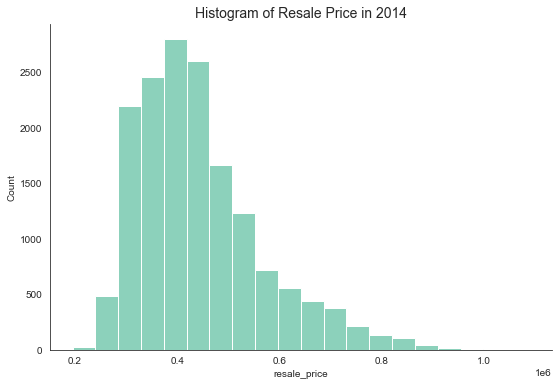

In [10]:
# The distribution is slightly biased, and we can consider log transformation

plt.figure(figsize=(9,6))
sns.histplot(x="resale_price",bins=20, data=df_model_2014)
plt.title("Histogram of Resale Price in 2014",fontsize=14)
sns.despine()

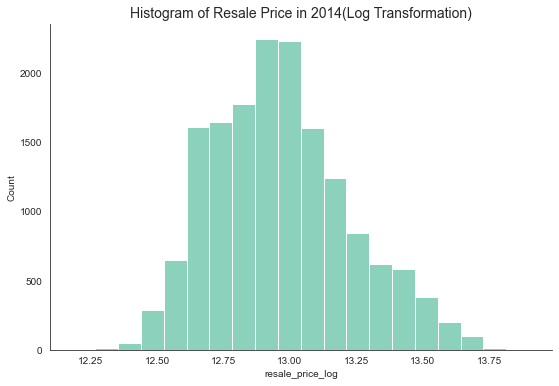

In [11]:
# The distribution after log transformation is much better. Let's use it as the prediction result of the final model and restore it with np.exp

plt.figure(figsize=(9,6))
sns.histplot(x="resale_price_log",bins=20, data=df_model_2014)
plt.title("Histogram of Resale Price in 2014(Log Transformation)",fontsize=14)
sns.despine()

### split train and test dataset

In [12]:
# 1/4 as test set

X=df_model_2014.drop(['resale_price_log','resale_price'],axis=1)
y=df_model_2014["resale_price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape)

X_train shape:  (12072, 3)
X_test shape :  (4024, 3)


In [13]:
numeric_features=["age"]
category_features=["town","flat_type"]

In [14]:
# Define the classifier, the logistic regression classifier
lr_model=LinearRegression()


parameters = {'regressor__alpha': np.logspace(-4,4,9)}

# one-hot encoding categorical features
categorical_transformer = Pipeline(
    [        
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

# The continuous variable age is retained without conversion
preprocessor = ColumnTransformer(
    [
        ('onehot_pipe', categorical_transformer, category_features)
    ],remainder = 'passthrough')

# Combine data preprocessing and modeling 
lr_pipe_model = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('regressor', lr_model)   
    ])

lr_pipe_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_pipe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['town', 'flat_type'])])),
                ('regressor', LinearRegression())])

In [15]:
# make prediction

y_train_lr_pred=lr_pipe_model.predict(X_train)
y_test_lr_pred=lr_pipe_model.predict(X_test)

In [16]:
lr_r2_train=r2_score(np.exp(y_train), np.exp(y_train_lr_pred))
lr_r2_test =r2_score(np.exp(y_test),   np.exp(y_test_lr_pred))

lr_rmse_train=np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_lr_pred)))
lr_rmse_test =np.sqrt(mean_squared_error(np.exp(y_test),   np.exp(y_test_lr_pred)))

print("Train R2: {:0.2f}; RMSE: {:0.2f}".format(lr_r2_train, lr_rmse_train))
print("Test  R2: {:0.2f}; RMSE: {:0.2f}".format(lr_r2_test, lr_rmse_test))

Train R2: 0.82; RMSE: 52221.98
Test  R2: 0.82; RMSE: 51478.31


+ The R2 of the training set and the test set are both 0.82, which seems to be OK

### Ridge


In [17]:
# Define the classifier,ridge regression
ridge_model=Ridge(random_state=42)

# Define the hyperparameter alpha needs to be tuned
parameters = {'regressor__alpha': np.logspace(-4,4,9)}

categorical_transformer = Pipeline(
    [        
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

preprocessor = ColumnTransformer(
    [
        ('onehot_pipe', categorical_transformer, category_features)
    ],remainder = 'passthrough')

model = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('regressor', ridge_model)   
    ])

ridge_pipe_model = GridSearchCV(model, parameters,cv=5, n_jobs=10)

# training
ridge_pipe_model.fit(X_train, y_train)

print("Best Hyper-parameters: ",ridge_pipe_model.best_params_)

Best Hyper-parameters:  {'regressor__alpha': 0.0001}


In [18]:
# make prediction

y_train_ridge_pred=ridge_pipe_model.predict(X_train)
y_test_ridge_pred=ridge_pipe_model.predict(X_test)

ridge_r2_train=r2_score(np.exp(y_train), np.exp(y_train_ridge_pred))
ridge_r2_test =r2_score(np.exp(y_test),   np.exp(y_test_ridge_pred))

ridge_rmse_train=np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_ridge_pred)))
ridge_rmse_test =np.sqrt(mean_squared_error(np.exp(y_test),   np.exp(y_test_ridge_pred)))

print("Train R2: {:0.2f}; RMSE: {:0.2f}".format(ridge_r2_train, ridge_rmse_train))
print("Test  R2: {:0.2f}; RMSE: {:0.2f}".format(ridge_r2_test, ridge_rmse_test))

Train R2: 0.82; RMSE: 52597.45
Test  R2: 0.82; RMSE: 51564.68


+ Ridge result is similar to linear regression

### Random Forest


In [19]:
# Define the classifier random forest
rf_model=RandomForestRegressor(random_state=42)

# define hyper parameter max_depth
parameters = {'regressor__max_depth': range(10,51,2)}

categorical_transformer = Pipeline(
    [        
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])
preprocessor = ColumnTransformer(
    [
        ('onehot_pipe', categorical_transformer, category_features)
    ],remainder = 'passthrough')

model = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('regressor', rf_model)   
    ])

rf_pipe_model = GridSearchCV(model, parameters,cv=5, n_jobs=10)

# training
rf_pipe_model.fit(X_train, y_train)

print("Best Hyper-parameters: ",rf_pipe_model.best_params_)

Best Hyper-parameters:  {'regressor__max_depth': 30}


In [20]:
# make prediction

y_train_rf_pred=rf_pipe_model.predict(X_train)
y_test_rf_pred=rf_pipe_model.predict(X_test)

rf_r2_train=r2_score(np.exp(y_train), np.exp(y_train_rf_pred))
rf_r2_test =r2_score(np.exp(y_test),   np.exp(y_test_rf_pred))

rf_rmse_train=np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_rf_pred)))
rf_rmse_test =np.sqrt(mean_squared_error(np.exp(y_test),   np.exp(y_test_rf_pred)))

print("Train R2: {:0.2f}; RMSE: {:0.2f}".format(rf_r2_train, rf_rmse_train))
print("Test  R2: {:0.2f}; RMSE: {:0.2f}".format(rf_r2_test, rf_rmse_test))

Train R2: 0.92; RMSE: 34813.77
Test  R2: 0.90; RMSE: 38912.51


**evaluation the r2 and rmse of the model on the test set**

+ Made three regression models, of which the random forest has r2=0.9 in the test set, which is higher than the linear regression and ridge models (0.82)
+ In addition, rmse=38912 is also smaller than ridge(51564) linear regression(51478), so we think random forest is the best model

## Question B**: 

A flat was sold in Nov 2017 with the following characteristics:

    + Flat type: 4 ROOM
    + Town: Yishun
    + Flat Model: New Generation
    + Storey Range: 10 to 12
    + Floor Area (sqm): 91
    + Lease Commence Date: 1984
    + Resale Price: 550,800


+ sklearn prediction can only get one value, if we want to get the confidence interval, we have to use statsmodels to train the ols model
+ since this question is given several features of a house, then the model we train should use these features
+ The method is to use these features to train a model and then predict the price range to see if the given value is within the range

### prepare model data

In [21]:
cols=['flat_type','town','flat_model','storey_range','floor_area_sqm','lease_commence_date','resale_price']
df_2017_sub=df[(df['year']==2017)][cols].copy()

df_2017_sub["resale_price"]=np.log(df_2017_sub["resale_price"])
df_2017_sub["age"]=2017-df_2017_sub["lease_commence_date"]
df_2017_sub.head()

,flat_type,town,flat_model,storey_range,floor_area_sqm,lease_commence_date,resale_price,age
694000,2 ROOM,ANG MO KIO,Improved,10 TO 12,44.0,1979,12.354493,38
694001,3 ROOM,ANG MO KIO,New Generation,01 TO 03,67.0,1978,12.429216,39
694002,3 ROOM,ANG MO KIO,New Generation,01 TO 03,67.0,1980,12.476100,37
694003,3 ROOM,ANG MO KIO,New Generation,04 TO 06,68.0,1980,12.487485,37
694004,3 ROOM,ANG MO KIO,New Generation,01 TO 03,67.0,1980,12.487485,37


In [22]:
df_2017_sub.shape

(20509, 8)

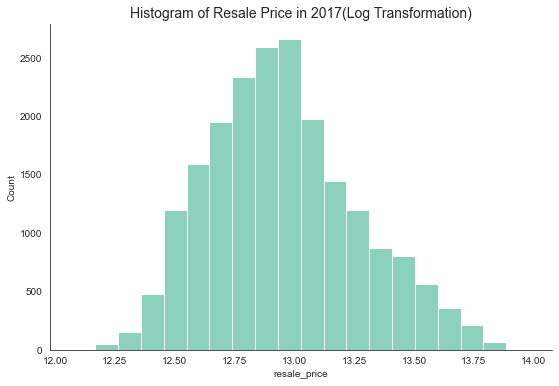

In [23]:
# first look at the y distribution 

plt.figure(figsize=(9,6))
sns.histplot(x="resale_price",bins=20, data=df_2017_sub)
plt.title("Histogram of Resale Price in 2017(Log Transformation)",fontsize=14)
sns.despine()

### fit ols

In [24]:
# The r2 of the model is 0.888, then this model is relatively representative and can be used for prediction

formula="resale_price ~ C(flat_type) + C(town) + C(flat_model) + C(storey_range) + floor_area_sqm + age"
reg=smf.ols(formula=formula,data=df_2017_sub)


results = reg.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     2445.
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:28:17   Log-Likelihood:                 17215.
No. Observations:               20509   AIC:                        -3.430e+04
Df Residuals:                   20442   BIC:                        -3.376e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### make prediction

In [25]:

df_sample_to_predict=pd.DataFrame([
                                                                ['4 ROOM','YISHUN','New Generation','10 TO 12',91,1984],    
                                                            ],columns=df_2017_sub.columns[:-2])
df_sample_to_predict["age"]=2017-df_sample_to_predict["lease_commence_date"]
df_sample_to_predict

,flat_type,town,flat_model,storey_range,floor_area_sqm,lease_commence_date,age
0,4 ROOM,YISHUN,New Generation,10 TO 12,91,1984,33


In [26]:
# From the previous ols regression results, select the coefficients related to the sample
# Note that the result has two columns: 0 for the lower limit and 1 for the upper limit
# We get two prediction results according to the upper and lower limits respectively, which is the upper and lower limits of the prediction results
# The default confidence level is 95%
df_coefs=results.conf_int().reset_index()
df_coefs=df_coefs[(df_coefs["index"].str.contains("Intercept"))|
                  (df_coefs["index"].str.contains("4 ROOM"))|
                  (df_coefs["index"].str.contains("YISHUN"))|
                  (df_coefs["index"].str.contains("New Generation"))|
                  (df_coefs["index"].str.contains("10 TO 12"))|
                  (df_coefs["index"].str.contains("floor_area_sqm"))|
                  (df_coefs["index"].str.contains("age"))
                 ]

df_coefs=df_coefs.set_index("index")
df_coefs

,0,1
index,,
Intercept,12.118932,12.279537
C(flat_type)[T.4 ROOM],0.331965,0.473821
C(town)[T.YISHUN],-0.242300,-0.223513
C(flat_model)[T.New Generation],-0.095077,-0.019302
C(storey_range)[T.10 TO 12],0.079871,0.089421
floor_area_sqm,0.007112,0.007632
age,-0.008924,-0.008456


In [27]:
# make prediction
prediction_lower, prediction_upper=sum(df_coefs[0].values *np.array([1,1,1,1,1,91,33])), sum(df_coefs[1].values *np.array([1,1,1,1,1,91,33]))
prediction_lower, prediction_upper=np.exp(prediction_lower), np.exp(prediction_upper)

prediction_lower, prediction_upper


(280981.20898507896, 449269.36802342726)

+ 550800 has exceeded the upper limit, indicating the price is unreasonable, there is a 95% probability to guarantee the reasonable price is within the above range

## Question C***: 

+ Someone mistakenly deleted the column containing data on Flat Type in the database. While backups exist, these data are critical to HDB’s daily operations, and time would be needed to restore these data from the backup. Senior management would like you to create a model to predict flat type given a transaction’s other characteristics. Explain the reasons for choosing this model.


,index,flat_type
0,1 ROOM,1292
1,2 ROOM,10614
2,3 ROOM,284397
3,4 ROOM,331842
4,5 ROOM,184520
5,EXECUTIVE,66780
6,MULTI GENERATION,531


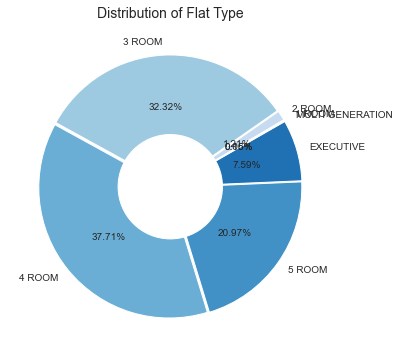

In [28]:
# First look at the distribution of flat types

y_dist=df["flat_type"].value_counts().sort_index()
display(y_dist.reset_index())

# plot
plt.figure(figsize=(6,6))
plt.pie(x=y_dist.values,labels = y_dist.index,autopct='%0.2f%%'
        ,startangle=30
        ,explode=[0.01]*y_dist.shape[0]
        ,colors=sns.color_palette("Blues", n_colors=y_dist.shape[0]))

circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.title("Distribution of Flat Type",fontsize=14)

plt.show()

### prepare model data

In [29]:
df["age"]=df["year"]-df["lease_commence_date"]
X=df[['month', 'town', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'age', 'resale_price']].copy()
y=df["flat_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape)

X_train shape:  (659982, 9)
X_test shape :  (219994, 9)


In [30]:
# Here we try two different classification models


In [31]:
# onehot encoding for Categorical variables 

category_features=['month', 'town', 'block', 'street_name', 'storey_range', 'flat_model']

In [32]:


le=LabelEncoder()

y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

### Random Forest

In [33]:
classification_model=RandomForestClassifier(random_state=42)

# range(30,101,10)： 30，40，50，60，70，80，90，100
parameters = {'classifier__max_depth': range(60,151,10)}


categorical_transformer = Pipeline(
    [        
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

preprocessor = ColumnTransformer(
    [
        ('onehot_pipe', categorical_transformer, category_features)
    ],remainder = 'passthrough')


model = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('classifier', classification_model)   
    ])


rf_pipe_classifier = GridSearchCV(model, parameters,cv=3, n_jobs=10)


rf_pipe_classifier.fit(X_train, y_train)

print("Best Hyper-parameters: ",rf_pipe_classifier.best_params_)

Best Hyper-parameters:  {'classifier__max_depth': 140}


In [34]:
y_train_pred_rf=rf_pipe_classifier.best_estimator_.predict(X_train)
y_test_pred_rf=rf_pipe_classifier.best_estimator_.predict(X_test)

In [35]:
# Classification report to see various indicators of the model


print(classification_report(y_train,y_train_pred_rf, target_names=le.classes_))

                  precision    recall  f1-score   support

          1 ROOM       1.00      1.00      1.00       963
          2 ROOM       1.00      1.00      1.00      8016
          3 ROOM       1.00      1.00      1.00    213390
          4 ROOM       1.00      1.00      1.00    248763
          5 ROOM       1.00      1.00      1.00    138378
       EXECUTIVE       1.00      1.00      1.00     50066
MULTI GENERATION       1.00      1.00      1.00       406

        accuracy                           1.00    659982
       macro avg       1.00      1.00      1.00    659982
    weighted avg       1.00      1.00      1.00    659982



In [36]:
print(classification_report(y_test,y_test_pred_rf, target_names=le.classes_))

                  precision    recall  f1-score   support

          1 ROOM       0.99      1.00      1.00       329
          2 ROOM       1.00      0.99      0.99      2598
          3 ROOM       1.00      1.00      1.00     71007
          4 ROOM       1.00      1.00      1.00     83079
          5 ROOM       1.00      1.00      1.00     46142
       EXECUTIVE       1.00      1.00      1.00     16714
MULTI GENERATION       1.00      1.00      1.00       125

        accuracy                           1.00    219994
       macro avg       1.00      1.00      1.00    219994
    weighted avg       1.00      1.00      1.00    219994



Text(0, 0.5, 'True')

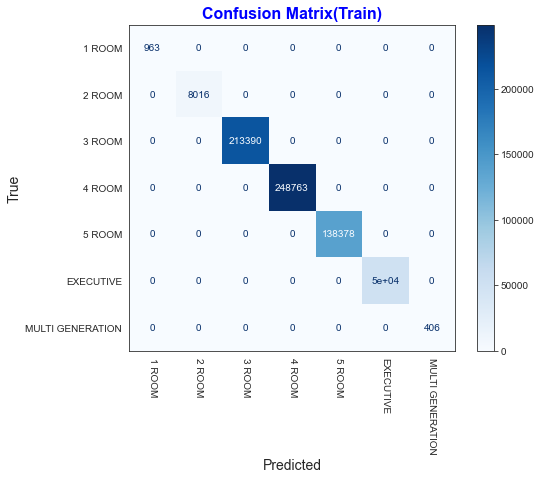

In [37]:
# Confusion matrix to see the number of correct and incorrect predictions for each category

plt.figure(figsize=(8,6))
ax=plt.gca()

disp = ConfusionMatrixDisplay.from_estimator(rf_pipe_classifier.best_estimator_,
                                             X_train, y_train, 
                                             display_labels=le.classes_,
                                             ax=ax,cmap=plt.cm.Blues)
plt.title("Confusion Matrix(Train)",fontsize=16,color="blue",fontweight="bold")
plt.xticks(rotation=-90)
plt.xlabel("Predicted",fontsize=14)
plt.ylabel("True",fontsize=14)


Text(0, 0.5, 'True')

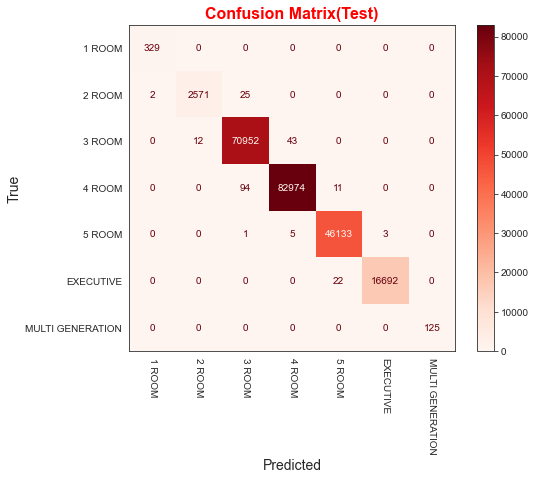

In [38]:
plt.figure(figsize=(8,6))
ax=plt.gca()

disp = ConfusionMatrixDisplay.from_estimator(rf_pipe_classifier.best_estimator_,
                                             X_test, y_test, 
                                             display_labels=le.classes_,
                                             ax=ax,cmap=plt.cm.Reds)
plt.title("Confusion Matrix(Test)",fontsize=16,color="red",fontweight="bold")
plt.xticks(rotation=-90)
plt.xlabel("Predicted",fontsize=14)
plt.ylabel("True",fontsize=14)

### Bagging

In [39]:
classification_model=BaggingClassifier(random_state=42)
parameters = {'classifier__n_estimators': range(10,101,10)}


categorical_transformer = Pipeline(
    [        
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

preprocessor = ColumnTransformer(
    [
        ('onehot_pipe', categorical_transformer, category_features)
    ],remainder = 'passthrough')

model = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('classifier', classification_model) 
    ])


bag_pipe_classifier = GridSearchCV(model, parameters,cv=3, n_jobs=10)


bag_pipe_classifier.fit(X_train, y_train)

print("Best Hyper-parameters: ",bag_pipe_classifier.best_params_)

Best Hyper-parameters:  {'classifier__n_estimators': 20}


In [40]:
y_train_pred_bag=bag_pipe_classifier.best_estimator_.predict(X_train)
y_test_pred_bag=bag_pipe_classifier.best_estimator_.predict(X_test)

In [41]:
print(classification_report(y_train,y_train_pred_bag, target_names=le.classes_))

                  precision    recall  f1-score   support

          1 ROOM       1.00      1.00      1.00       963
          2 ROOM       1.00      1.00      1.00      8016
          3 ROOM       1.00      1.00      1.00    213390
          4 ROOM       1.00      1.00      1.00    248763
          5 ROOM       1.00      1.00      1.00    138378
       EXECUTIVE       1.00      1.00      1.00     50066
MULTI GENERATION       1.00      1.00      1.00       406

        accuracy                           1.00    659982
       macro avg       1.00      1.00      1.00    659982
    weighted avg       1.00      1.00      1.00    659982



In [42]:
print(classification_report(y_test,y_test_pred_bag, target_names=le.classes_))

                  precision    recall  f1-score   support

          1 ROOM       1.00      1.00      1.00       329
          2 ROOM       1.00      1.00      1.00      2598
          3 ROOM       1.00      1.00      1.00     71007
          4 ROOM       1.00      1.00      1.00     83079
          5 ROOM       1.00      1.00      1.00     46142
       EXECUTIVE       1.00      1.00      1.00     16714
MULTI GENERATION       1.00      1.00      1.00       125

        accuracy                           1.00    219994
       macro avg       1.00      1.00      1.00    219994
    weighted avg       1.00      1.00      1.00    219994



Text(0, 0.5, 'True')

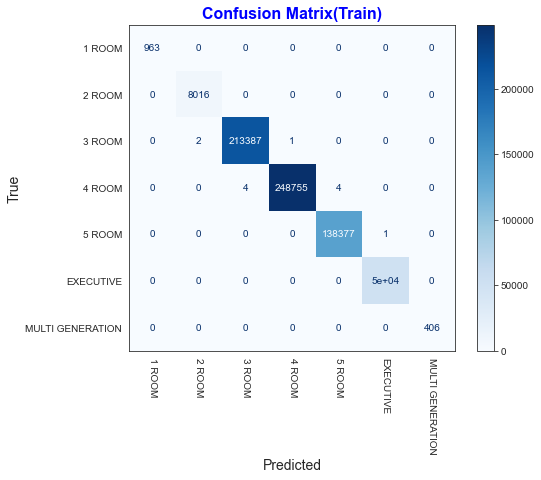

In [43]:
plt.figure(figsize=(8,6))
ax=plt.gca()

disp = ConfusionMatrixDisplay.from_estimator(bag_pipe_classifier.best_estimator_,
                                             X_train, y_train, 
                                             display_labels=le.classes_,
                                             ax=ax,cmap=plt.cm.Blues)
plt.title("Confusion Matrix(Train)",fontsize=16,color="blue",fontweight="bold")
plt.xticks(rotation=-90)
plt.xlabel("Predicted",fontsize=14)
plt.ylabel("True",fontsize=14)

Text(0, 0.5, 'True')

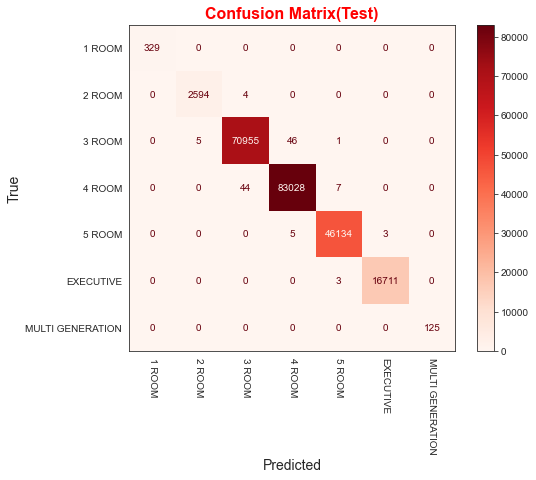

In [44]:
plt.figure(figsize=(8,6))
ax=plt.gca()

disp = ConfusionMatrixDisplay.from_estimator(bag_pipe_classifier.best_estimator_,
                                             X_test, y_test, 
                                             display_labels=le.classes_,
                                             ax=ax,cmap=plt.cm.Reds)
plt.title("Confusion Matrix(Test)",fontsize=16,color="red",fontweight="bold")
plt.xticks(rotation=-90)
plt.xlabel("Predicted",fontsize=14)
plt.ylabel("True",fontsize=14)

+ BaggingClassifier predicts more accurately.

# Section 3: Policy Analysis

## Question A*: 
    
+ Yishun has received a negative reputation as “Crazy Town”, and property prices might have been impacted. Are Yishun flats the cheapest in the country?

In [5]:
# Calculate the average house price, median house price in each town 
# mean and median can be used to measure

df["price_per_area"]=df["resale_price"]/df["floor_area_sqm"]

df_town_price=df.groupby(['town'])["price_per_area"].agg(["mean","median"]).reset_index()
df_town_price["color"]=df_town_price["town"].map(lambda x: 'red' if x =='YISHUN' else 'gray')
df_town_price.head()

,town,mean,median,color
0,ANG MO KIO,2968.530971,2641.791045,gray
1,BEDOK,2972.460928,2685.950413,gray
2,BISHAN,3826.131263,3559.850746,gray
3,BUKIT BATOK,2785.609217,2520.661157,gray
4,BUKIT MERAH,3924.543589,3389.830508,gray


In [6]:
df_town_mon_price=df.groupby(['town','month'])["price_per_area"].agg(["mean","median"]).reset_index()
df_town_mon_price["color"]=df_town_mon_price["town"].map(lambda x: 'red' if x =='YISHUN' else 'gray')
df_town_mon_price["month"]=pd.to_datetime(df_town_mon_price["month"])
df_town_mon_price.head()

,town,month,mean,median,color
0,ANG MO KIO,1990-01-01,707.771063,683.823529,gray
1,ANG MO KIO,1990-02-01,741.459549,701.492537,gray
2,ANG MO KIO,1990-03-01,714.943854,694.117647,gray
3,ANG MO KIO,1990-04-01,730.427827,700.000000,gray
4,ANG MO KIO,1990-05-01,725.757094,693.902439,gray


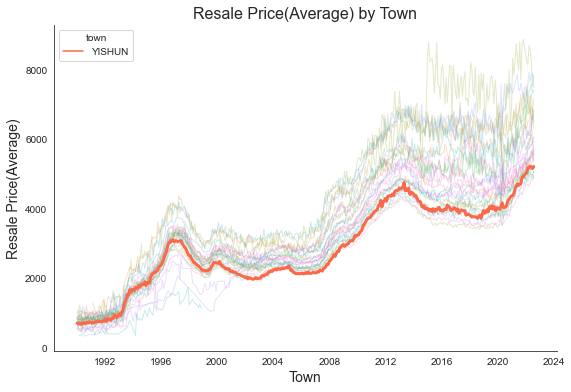

In [7]:
plt.figure(figsize=(9,6))
ax=plt.gca()

sns.lineplot(x="month",y="mean",  hue='town',linewidth=1,alpha=0.25,data=df_town_mon_price, legend=False)
sns.lineplot(x="month",y="mean", hue='town',linewidth=3, palette="Reds", data=df_town_mon_price[df_town_mon_price["town"]=="YISHUN"])

plt.title("Resale Price(Average) by Town",fontsize=16)
plt.xticks(rotation=0)
plt.xlabel("Town",fontsize=14)
plt.ylabel("Resale Price(Average)",fontsize=14)
sns.despine()

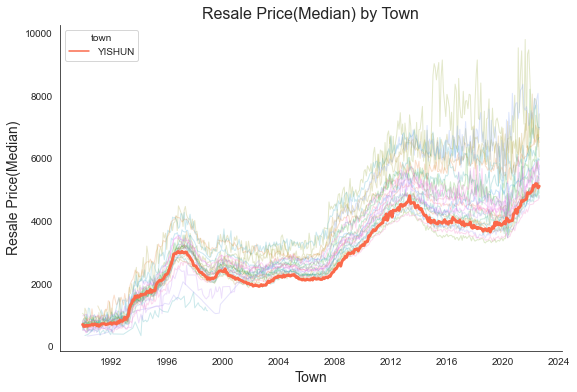

In [8]:
plt.figure(figsize=(9,6))
ax=plt.gca()

sns.lineplot(x="month",y="median",  hue='town',linewidth=1,alpha=0.25,data=df_town_mon_price, legend=False)
sns.lineplot(x="month",y="median", hue='town',linewidth=3, palette="Reds", data=df_town_mon_price[df_town_mon_price["town"]=="YISHUN"])

plt.title("Resale Price(Median) by Town",fontsize=16)
plt.xticks(rotation=0)
plt.xlabel("Town",fontsize=14)
plt.ylabel("Resale Price(Median)",fontsize=14)
sns.despine()

## Question B*: 

+ Some members of public have been saying that flat sizes have gotten smaller over the years. Is there any truth in this statement?

In [48]:
# Calculate floor area mean and median

df_year_size=df.groupby('lease_commence_date')["floor_area_sqm"].agg(["mean","median"]).stack().reset_index()
df_year_size.columns=["year","type","size"]
df_year_size.head()

,year,type,size
0,1966,mean,67.533333
1,1966,median,67.000000
2,1967,mean,58.315620
3,1967,median,60.000000
4,1968,mean,60.415033


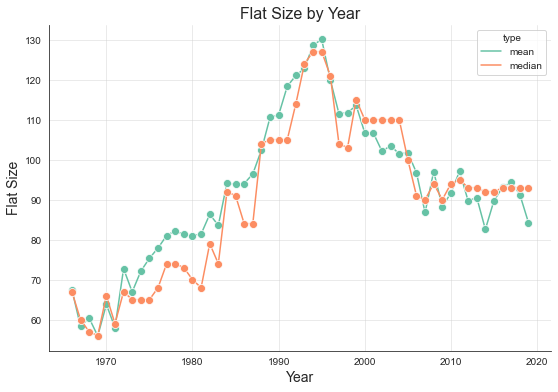

In [49]:
plt.figure(figsize=(9,6))
ax=plt.gca()

sns.lineplot(x="year", y="size",hue="type",marker="o", markersize=8, data=df_year_size)
plt.title("Flat Size by Year",fontsize=16)
plt.xticks(rotation=0)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Flat Size",fontsize=14)
plt.grid(alpha=0.5)
sns.despine()

## Question C v2**: 

+ The Downtown Line Stage 2 connects the Bukit Panjang heartland to the city. Have prices increased for resale flats in the towns served by this Line? You might want to use a difference- in-differences model for this task.

+ First of all, we select CHOA CHU KANG as the comparison group of BUKIT PANJANG (these two towns are very close and reasonable to compare the difference)
+ because CHOA CHU KANG also has houses close to BUKIT PANJANG MRT station, so it is better to exclude these data
+ On the contrary, we should use the data of the annexed time period before and after the opening of the mrt as a comparison. Let's take one year.

In [10]:
df_hdb_dist=pd.read_csv("./data/hdb_resale.csv")
df_hdb_dist["month"] =pd.to_datetime(df_hdb_dist["month"])

# df_hdb_dist=df_hdb_dist[df_hdb_dist['flat_type']=='4 ROOM'].copy()
df_hdb_dist.head()

,town,flat_type,flat_model,floor_area_sqm,resale_price,month,address,Latitude,Longitude,full_address,dist_mrt,near_mrt
0,ANG MO KIO,1 ROOM,IMPROVED,31.0,9000.0,1990-01-01,309 ANG MO KIO AVE 1 SINGAPORE,1.364512,103.842076,"Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Ce...",1.027186,ANG MO KIO MRT STATION
1,ANG MO KIO,1 ROOM,IMPROVED,31.0,6000.0,1990-01-01,309 ANG MO KIO AVE 1 SINGAPORE,1.364512,103.842076,"Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Ce...",1.027186,ANG MO KIO MRT STATION
2,ANG MO KIO,1 ROOM,IMPROVED,31.0,8000.0,1990-01-01,309 ANG MO KIO AVE 1 SINGAPORE,1.364512,103.842076,"Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Ce...",1.027186,ANG MO KIO MRT STATION
3,ANG MO KIO,1 ROOM,IMPROVED,31.0,6000.0,1990-01-01,309 ANG MO KIO AVE 1 SINGAPORE,1.364512,103.842076,"Ang Mo Kio Avenue 1, Ang Mo Kio, Singapore, Ce...",1.027186,ANG MO KIO MRT STATION
4,ANG MO KIO,3 ROOM,NEW GENERATION,73.0,47200.0,1990-01-01,216 ANG MO KIO AVE 1 SINGAPORE,1.366209,103.841476,"216, Ang Mo Kio Avenue 1, Ang Mo Kio Grove, An...",0.989224,ANG MO KIO MRT STATION


In [11]:
# CHOA CHU KANG also has transaction records close to BUKIT PANJANG MRT STATION
# In order to have comparative significance, we delete the relevant data

# BUKIT PANJANG will choose BUKIT PANJANG MRT
# CHOA CHU KANG will choose YEW TEE MRT STATION (NS5)    CHOA CHU KANG MRT STATION (NS4) data
df_hdb_dist[df_hdb_dist["town"].isin(["BUKIT PANJANG","CHOA CHU KANG" ])].groupby(['town','near_mrt']).size()

town           near_mrt                       
BUKIT PANJANG  BUKIT PANJANG MRT STATION          16679
               CASHEW MRT STATION (DT2)            6297
CHOA CHU KANG  BUKIT PANJANG MRT STATION           5002
               CHOA CHU KANG MRT STATION (NS4)    18897
               YEW TEE MRT STATION (NS5)           9721
dtype: int64

In [12]:
# BUKIT PANJANG is the treatment group CHOA CHU KANG is the comparison group
# Time period is selected within 1 year before and after the opening of the DTL2


conditions1=(df_hdb_dist["town"]=="BUKIT PANJANG") \
                &(df_hdb_dist["near_mrt"]=='BUKIT PANJANG MRT STATION') \
                &((df_hdb_dist["month"]>='2015-01-01') & (df_hdb_dist["month"]<='2016-12-31'))  

conditions2=(df_hdb_dist["town"]=="CHOA CHU KANG") \
                &(df_hdb_dist["near_mrt"].isin(['CHOA CHU KANG MRT STATION (NS4)','YEW TEE MRT STATION (NS5)'])) \
                &((df_hdb_dist["month"]>='2015-01-01') & (df_hdb_dist["month"]<='2016-12-31'))

df_hdb_dist_model=df_hdb_dist[(conditions1|conditions2)][["town","month","floor_area_sqm","resale_price","near_mrt"]].copy()
df_hdb_dist_model["avg_price"]=df_hdb_dist_model["resale_price"]/df_hdb_dist_model["floor_area_sqm"]
df_hdb_dist_model["time"]=df_hdb_dist_model["month"].map(lambda x: 1 if x>pd.to_datetime('2016-01-01') else 0)
df_hdb_dist_model.head()

,town,month,floor_area_sqm,resale_price,near_mrt,avg_price,time
657130,BUKIT PANJANG,2015-01-01,64.0,310000.0,BUKIT PANJANG MRT STATION,4843.750000,0
657131,BUKIT PANJANG,2015-01-01,73.0,315000.0,BUKIT PANJANG MRT STATION,4315.068493,0
657132,BUKIT PANJANG,2015-01-01,73.0,328000.0,BUKIT PANJANG MRT STATION,4493.150685,0
657133,BUKIT PANJANG,2015-01-01,106.0,297000.0,BUKIT PANJANG MRT STATION,2801.886792,0
657136,BUKIT PANJANG,2015-01-01,104.0,345888.0,BUKIT PANJANG MRT STATION,3325.846154,0


In [13]:
# Comparing the average prices of the two towns in different periods It seems that the prices of BUKIT PANJANG before and after the opening of the MRT have increased slightly, 
# but whether this increase is significant depends on the model
# At the same time, the price of CHOA CHU KANG has hardly changed before and after the opening of DTL2.
df_hdb_dist_model.pivot_table(index="town", columns="time",values="avg_price",aggfunc="mean")

time,0,1
town,,
BUKIT PANJANG,4014.042643,4069.654778
CHOA CHU KANG,3576.466771,3527.823644


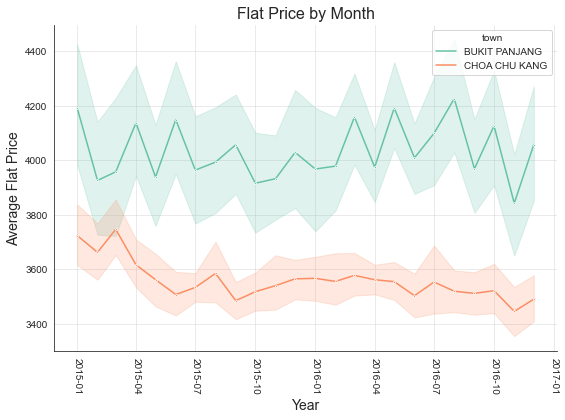

In [14]:
plt.figure(figsize=(9,6))
ax=plt.gca()

sns.lineplot(x="month", y="avg_price",hue="town",marker="o", markersize=2, data=df_hdb_dist_model)
plt.title("Flat Price by Month",fontsize=16)
plt.xticks(rotation=-90)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Average Flat Price",fontsize=14)
plt.grid(alpha=0.5)
sns.despine()

In [15]:
df_did_model=df_hdb_dist_model.copy()
df_did_model["group"]=df_did_model["town"].map(lambda x: 1 if x=='BUKIT PANJANG' else 0)
df_did_model["time_group"]=df_did_model["time"]*df_did_model["group"]
df_did_model.head()

,town,month,floor_area_sqm,resale_price,near_mrt,avg_price,time,group,time_group
657130,BUKIT PANJANG,2015-01-01,64.0,310000.0,BUKIT PANJANG MRT STATION,4843.750000,0,1,0
657131,BUKIT PANJANG,2015-01-01,73.0,315000.0,BUKIT PANJANG MRT STATION,4315.068493,0,1,0
657132,BUKIT PANJANG,2015-01-01,73.0,328000.0,BUKIT PANJANG MRT STATION,4493.150685,0,1,0
657133,BUKIT PANJANG,2015-01-01,106.0,297000.0,BUKIT PANJANG MRT STATION,2801.886792,0,1,0
657136,BUKIT PANJANG,2015-01-01,104.0,345888.0,BUKIT PANJANG MRT STATION,3325.846154,0,1,0


In [16]:
est = smf.ols(formula="avg_price ~ time + group + time_group", data=df_did_model).fit() 

print(est.summary()) 

                            OLS Regression Results                            
Dep. Variable:              avg_price   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     207.9
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          4.60e-120
Time:                        22:07:31   Log-Likelihood:                -18508.
No. Observations:                2439   AIC:                         3.702e+04
Df Residuals:                    2435   BIC:                         3.705e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3576.4668     17.913    199.659      0.0

+ The p-value of time_group is 0.008, which indicates that there are obvious differences in the house prices of different towns in different time periods.
+ The coefficient value of 104 is positive, indicating the resale price of BUKIT PANJANG flats was increased compared to its comparison group CHOA CHU KANG.



## Question D***: 

+ There have been comments online that people are buying flats in towns further from the city so that the cost savings can be used for a car. Are resale prices in HDB estates in areas further away from the city (i.e. Sengkang and Punggol) impacted by Certificate of Entitlement (COE) prices for cars?


+ This question is mainly to show the relationship between house price and coe


In [19]:


df_coe=pd.read_excel("./data/Results of COE Bidding Exercise.xlsx",sheet_name="Results")

df_coe["total_premium"]=df_coe["Number of Successful Bids"]*df_coe["Quota Premium"]
df_coe=df_coe[df_coe["Category"]=="Cat A (Cars up to 1600cc and 97kW)"]

df_coe["Announcement Date"]=pd.to_datetime(df_coe["Announcement Date"])
df_coe=df_coe.set_index("Announcement Date")
df_coe.head()

,Bidding Exercise,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,total_premium
Announcement Date,,,,,,,,,,,,,,,,,,,
2022-08-17,August 2022 Second Open Bidding Exercise,2022,Cat A (Cars up to 1600cc and 97kW),551,87889,835,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48426839
2022-08-03,August 2022 First Open Bidding Exercise,2022,Cat A (Cars up to 1600cc and 97kW),554,80000,689,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43280000
2022-07-20,July 2022 Second Open Bidding Exercise,2022,Cat A (Cars up to 1600cc and 97kW),628,78899,834,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48917380
2022-07-06,July 2022 First Open Bidding Exercise,2022,Cat A (Cars up to 1600cc and 97kW),617,78001,900,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47268606
2022-06-22,June 2022 Second Open Bidding Exercise,2022,Cat A (Cars up to 1600cc and 97kW),614,74989,850,598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44843422


In [20]:
df_coe_premium=df_coe.resample("M").agg({"total_premium":"sum","Number of Successful Bids":"sum" }).reset_index()
df_coe_premium["avg_premium"]=df_coe_premium["total_premium"]/df_coe_premium["Number of Successful Bids"]

df_coe_premium["month"]=df_coe_premium["Announcement Date"].map(lambda x: "{}-{}".format(x.year, str(x.month).zfill(2)))
df_coe_premium.head()

,Announcement Date,total_premium,Number of Successful Bids,avg_premium,month
0,2002-04-30,81951492,2240,36585.487500,2002-04
1,2002-05-31,75518080,2207,34217.526053,2002-05
2,2002-06-30,70783318,2238,31627.934763,2002-06
3,2002-07-31,69230002,2226,31100.629829,2002-07
4,2002-08-31,68190135,2215,30785.613995,2002-08


In [21]:
df_coe_premium["month"].min(),df_coe_premium["month"].max(),df_coe_premium.shape

('2002-04', '2022-08', (245, 5))

In [23]:
df_mon_town_price=df.pivot_table(index="month", columns="town", values="price_per_area", aggfunc="mean")
df_resale_price_sub_sp=df_mon_town_price.loc[:,['SENGKANG','PUNGGOL']].copy()

df_resale_price_sub_sp=pd.merge(df_resale_price_sub_sp.reset_index(), df_coe_premium[['month','avg_premium' ]], on="month")

df_resale_price_sub_sp=df_resale_price_sub_sp.dropna()
df_resale_price_sub_sp.head()

,month,SENGKANG,PUNGGOL,avg_premium
36,2005-04,2567.437859,2661.818182,18189.939360
37,2005-05,2577.424500,2806.565657,17143.772994
38,2005-06,2576.735802,2802.197802,17384.735780
39,2005-07,2505.300897,2764.705882,16305.077237
41,2005-09,2520.107889,2753.527273,15886.975760


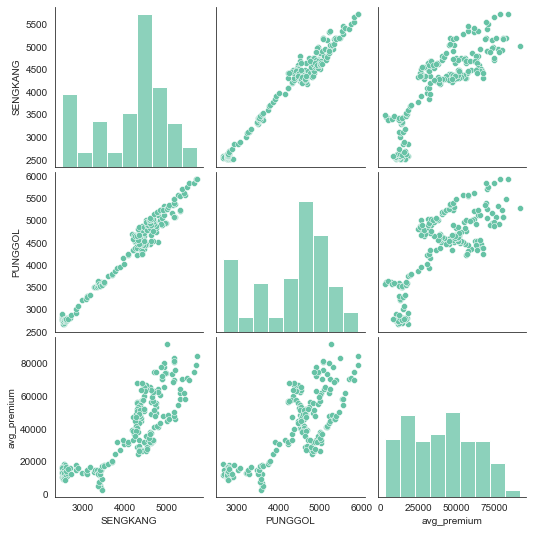

In [24]:

sns.pairplot(df_resale_price_sub_sp.drop("month", axis=1))

+ It seems that the housing prices of the two towns are quite related to the coe price
+ According to the above picture, mainly look at the last row or the last column
+ The scatter plot is linear, indicating that the coe price is positively correlated with the housing prices of the two towns, and a correlation coefficient can also be given
+ The correlation coefficient between SENGKANG house price and coe price is 0.84; the correlation coefficient between PUNGGOL house price and coe price is 0.79;

In [25]:
df_resale_price_sub_sp.corr()

,SENGKANG,PUNGGOL,avg_premium
SENGKANG,1.000000,0.984983,0.841826
PUNGGOL,0.984983,1.000000,0.788379
avg_premium,0.841826,0.788379,1.000000
